In [1]:
%pylab inline
import matplotlib.pyplot as plt 
import numpy as np
import os
import cv2

Populating the interactive namespace from numpy and matplotlib


# **Solutions to exercises in course "Image and Video Processing" by Prof. Guillermo Sapiro, Duke University.**

### Week 3 outline:
* Histogram equalization
* Median filter 
* Non-local means algorithm
* Noise and averaging
* Color edge detection

# 1. Histogram equalization

**TASK**: Implement a histogram equalization function. 


* Histogram equalization aims at creation of an image with equally distributed brightness levels over the whole brightness scale. It enhances contrast for brightness values close to histogram maxima, and decreases contrast near minima.
* The goal is to find a monotonic pixel brightness transformation q = T(p) such that the desired output histogram G(q) is uniform over the whole output brightness scale.
* It turns out that the  pixel brightness transformation q = T(p) that satisfies this requirement is the cumulative histogram distribution of the original image multiplied by the max value of the grey level.
* In this case, the equalized histogram G(q)  (approximately because of the discrete pixel values) corresponds to the uniform probability density function whose function value is a constant. 

 ### 1.0 Read an image and convert it to the grey scale

dtype('uint8')

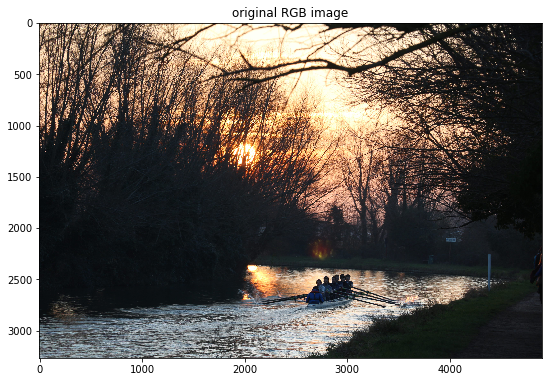

In [2]:
image = plt.imread('river.jpg')
plt.figure(figsize=(9,9))
plt.title('original RGB image')
plt.imshow(image)
image.dtype

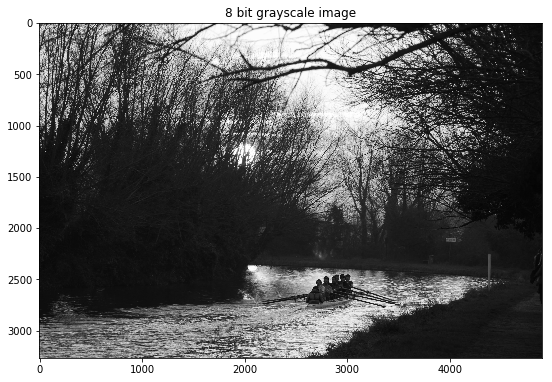

In [3]:
def rgb2gray(rgb_image):
    """
    a function converting grey to rgb
    """
    image_8bit = np.round(np.sum(rgb_image * np.array([0.114, 0.587, 0.299]), axis=-1)).astype('uint8')
    plt.figure(figsize=(9,9))
    plt.imshow(image_8bit , cmap='gray')
    plt.title('8 bit grayscale image')
    return image_8bit

gray_image = rgb2gray(image)

> Check the number of unique grey levels

In [11]:
np.unique(gray_image).shape

(256,)

### 1.1 Compute a histogram of the original image

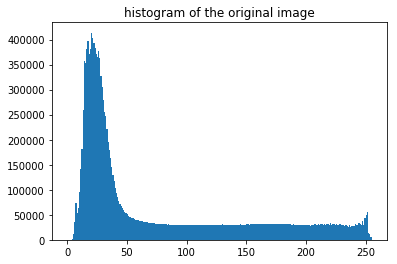

In [30]:
bin_counts, bin_edges, patches = plt.hist(gray_image.ravel(), bins=256)
plt.title("histogram of the original image")

### 1.2 Compute its  cumulative histogram

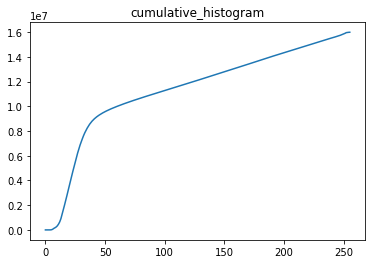

In [31]:
#compute a cumulative_histogram of the original image
cumulative_histogram = np.array([sum(bin_counts[:i+1]) for i in range(len(bin_counts))])

plt.plot(cumulative_histogram)
plt.title('cumulative_histogram')
plt.show()

### 1.3 Compute a transformation function to map the pixel values

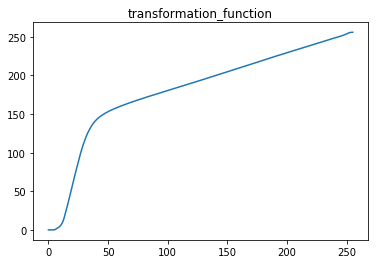

In [36]:
grey_levels  = 256

# note that the min value is subtracted (in the nominator) and it's also scaled by its maximum value (in the denominator) to have the same grey level range of the original image
transformation_function =  grey_levels * (cumulative_histogram - cumulative_histogram.min())  / (cumulative_histogram.max() - cumulative_histogram.min())

plt.plot(transformation_function)
plt.title('transformation_function')
plt.show()

### 1.4 Obtain an equalized image by mapping the old pixel vales into new ones using the transformation function.

(15991970,)


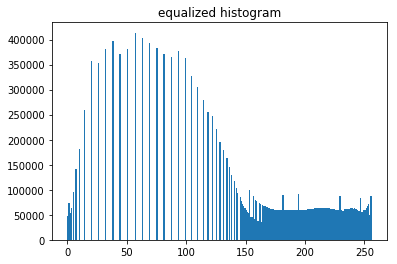

In [37]:
gray_image_equalized = transformation_function[gray_image.ravel()]

plt.hist(gray_image_equalized, bins=256)
plt.title('equalized histogram')
print(gray_image_equalized.shape)

Reshape the equalized image and plot it.

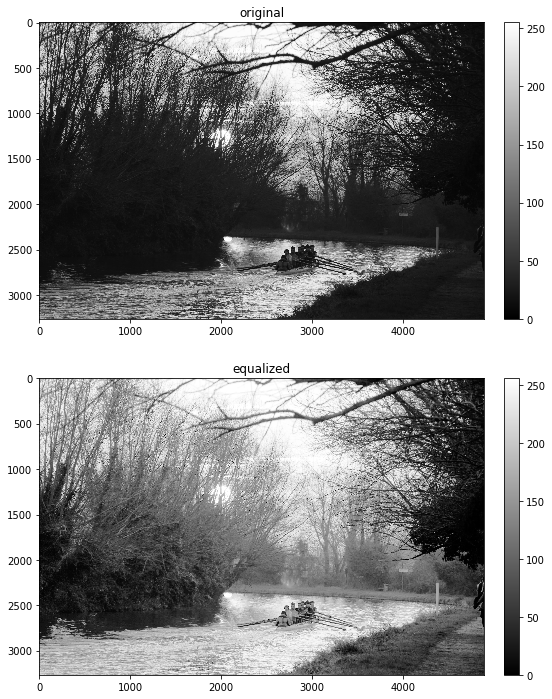

In [38]:
gray_image_equalized = np.reshape(gray_image_equalized, gray_image.shape)

fig, axs = plt.subplots(2, 1, figsize=(12,12))
ax1, ax2 = axs
im1=ax1.imshow(gray_image, cmap='gray')
ax1.set_title('original')
im2=ax2.imshow(gray_image_equalized, cmap='gray')
ax2.set_title('equalized')
plt.colorbar(im1,ax=ax1,fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=ax2,fraction=0.035, pad=0.03)